<a href="https://colab.research.google.com/github/Demonious/CEV-DataScience-Tasks/blob/main/Contest_W4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CONTEST: In groups of 2 students, please try to develop a statistically valid predictor of CDRGLOB via using feature engineering. This means you need to work on the numeric values of the features (variables/columns) by performing multiplications and/or division operations. One such instance is BMI in which we divide weight by height square to get a good indicator of health (skinny, normal, obese, very obese etc). Thus, you should provide a mathematical formula and you should provide arguments and statistical analyses for the validation of your formula.

Here is an example that is just to illustrate how it can happen:

data["Tunas Formula"] = (data["NACCBMI"] * data["EDUC"]) / (data["HIPPOVOL"] * data["HIPPOVOL"] * data["INDEPEND"])

Evaluation metric for the contest: 1- You should provide the outputs for a correlation analysis between CDRGLOB and your formula's score. 2- You should also provide the group mean values for your formula's scores for each of 4 groups (CDRGLOB). 3- You should provide a visual illustration for the scores (of your formula) with respect to a variable (you should demonstrate the output in a scatter plot in which the cases should be colored with respect to CDRGLOB values).

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [21]:
data = pd.read_excel("Temporary_data3_-_Copy.xlsx")
data

,SEX,EDUC,MARISTAT,INDEPEND,RESIDENC,NACCFAM,ANYMEDS,SMOKYRS,NACCTBI,DIABETES,ALCOHOL,HXHYPER,HYPERCHO,HXSTROKE,FOCLSIGN,HACHIN,CDRGLOB,DEL,HALL,AGIT,DEPD,ANX,ELAT,APA,DISN,IRR,MOT,NITE,APP,NACCGDS,DROPACT,NACCMMSE,NACCAGEB,NACCAMD,NACCBMI,NACCAPOE,NACCNE4S,NACCICV,NACCBRNV,NACCWMVL,CSFVOL,GRAYVOL,WHITEVOL,WMHVOL,HIPPOVOL,CEREALL,CERETISS,CERECSF,CEREGR,CEREWH,LHIPPO,RHIPPO,LLATVENT,RLATVENT,LATVENT,THIRVENT,LFRCORT,RFRCORT,FRCORT,LOCCORT,ROCCORT,OCCCORT,LPARCORT,RPARCORT,PARCORT,LTEMPCOR,RTEMPCOR,TEMPCOR,LCAC,LCACM,LCMF,LCMFM,LCUN,LCUNM,LENT,LENTM,LFUS,LFUSM,LINFPAR,LINFPARM,LINFTEMP,LINFTEMM,LINSULA,LINSULAM,LISTHC,LISTHCM,LLATOCC,LLATOCCM,LLATORBF,LLATORBM,LLING,LLINGM,LMEDORBF,LMEDORBM,LMIDTEMP,LMIDTEMM,LPARCEN,LPARCENM,LPARHIP,LPARHIPM,LPARSOP,LPARSOPM,LPARORB,LPARORBM,LPARTRI,LPARTRIM,LPERCAL,LPERCALM,LPOSCEN,LPOSCENM,LPOSCIN,LPOSCINM,LPRECEN,LPRECENM,LPRECUN,LPRECUNM,LROSANC,LROSANCM,LROSMF,LROSMFM,LSUPFR,LSUPFRM,LSUPPAR,LSUPPARM,LSUPTEM,LSUPTEMM,LSUPMAR,LSUPMARM,LTRTEM,LTRTEMM,RCAC,RCACM,RCMF,RCMFM,RCUN,RCUNM,RENT,RENTM,RFUS,RFUSM,RINFPAR,RINFPARM,RINFTEMP,RINFTEMM,RINSULA,RINSULAM,RISTHC,RISTHCM,RLATOCC,RLATOCCM,RLATORBF,RLATORBM,RLING,RLINGM,RMEDORBF,RMEDORBM,RMIDTEMP,RMIDTEMM,RPARCEN,RPARCENM,RPARHIP,RPARHIPM,RPARSOP,RPARSOPM,RPARORB,RPARORBM,RPARTRI,RPARTRIM,RPERCAL,RPERCALM,RPOSCEN,RPOSCENM,RPOSCIN,RPOSCINM,RPRECEN,RPRECENM,RPRECUN,RPRECUNM,RROSANC,RROSANCM,RROSMF,RROSMFM,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2,18,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,56,10,25.1,3,0,1399.056,1118.929,481.802,279.718,637.536,481.393,0.4088,6.9900,1189.23,952.446,236.781,517.620,434.417,3.5363,3.4538,8.3738,6.8119,15.1875,0.8231,89.8988,90.9769,181.404,28.7775,30.6600,59.4600,51.9338,50.8688,102.8180,68.0513,62.5875,131.0400,2.4731,1.9636,3.4238,1.7395,4.0425,1.2197,5.0494,3.3557,10.7381,2.5392,12.3469,2.3224,12.5194,2.9848,6.1388,2.7990,2.4263,2.2086,11.2106,1.8961,8.0156,2.4951,6.2644,1.3553,4.5619,2.2564,14.3644,2.7367,3.0975,1.2979,4.5094,1.9378,5.1506,1.9780,1.9931,2.0589,5.1769,1.8350,2.1169,1.2519,9.4013,1.2137,3.7763,1.8875,10.5131,1.4798,10.1063,1.8533,3.6656,2.8356,11.8181,2.1284,28.0594,2.2255,12.1406,1.4967,15.0938,1.9541,12.2400,1.8840,0.9150,1.2724,1.6819,2.1905,7.2113,1.9629,4.0125,1.2922,4.0931,3.5253,9.3525,2.4511,13.0313,2.3928,11.4619,3.3607,6.6225,3.2028,2.3231,2.2373,11.5238,2.0450,8.8388,2.5886,6.6544,1.3971,5.3531,2.3187,15.3469,2.6912,3.2513,1.2745,4.2731,1.8069,4.7063,1.9472,1.7475,1.9531,3.8381,1.8080,2.5706,1.3220,10.4494,1.4152,3.3844,2.0756,11.6831,1.8149,8.9925,1.8048,2.6363,2.9186,11.0550,2.0921,27.9038,2.2157,10.3481,1.7014,13.4250,1.7419,9.8700,1.6792,0.8906,1.1947
1,1,11,1,1,1,1,1,0,0,0,0,1,1,0,0,1,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,19,65,6,30.3,1,0,1578.180,1107.680,477.910,468.740,631.530,476.150,1.7600,5.8700,1382.83,975.620,407.210,533.580,440.280,3.2000,2.6700,25.5100,56.3300,81.8500,2.0200,98.4800,93.6300,192.900,34.0800,33.0100,67.1100,46.1300,45.7200,91.9100,63.6700,53.6600,117.4700,3.0600,2.9800,5.4300,1.8600,5.3800,1.4000,3.9300,3.1700,9.3700,2.0700,11.0000,1.7700,10.0900,2.5300,6.5900,3.4100,3.2000,2.1100,11.6200,1.4200,8.7200,2.4100,7.2300,1.2900,4.6600,2.4000,12.5200,1.8700,5.3500,2.0000,3.9000,1.7600,5.9900,2.0900,1.5800,2.0700,4.2200,2.0100,3.3600,1.1600,8.7900,1.5700,4.5800,2.1200,13.3400,1.9700,9.3700,1.7800,4.6600,3.3200,13.2200,1.9900,25.8600,2.5000,11.1700,1.8400,18.1600,2.3500,9.2500,2.0700,1.2800,2.2400,2.2700,3.4200,6.7600,1.9000,4.6800,1.5100,3.2900,2.3400,6.9300,1.5300,11.7300,1.9000,10.0800,2.4800,6.9200,3.6300,2.3600,1.6900,11.8800,1.3500,9.5300,2.5700,7.2600,1.1300,4.9900,2.4800,9.8800,1.9900,5.4500,2.1400,3.6400,1.3400,4.1100,2.0600,2.0200,2.2200,3.1400,1.7400,3.1100,1.2800,9.4400,1.6900,4.3500,2.6500,14.4500,2.0100,9.0000,1.7900,2.6400,3.0300,8.3800,1.7700,29.0600,2.6900,9.2500,1.6300,14.8800,2.3000,7.2700,1.8900,1.3800,2.0300
2,2,16,1,1,1,1,1,10,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,29,58,1,23.2,1,0

In [22]:
data.corr()["CDRGLOB"]

SEX        -0.180540
EDUC       -0.140977
MARISTAT   -0.141259
INDEPEND    0.693881
RESIDENC    0.047407
NACCFAM    -0.031420
ANYMEDS     0.046006
SMOKYRS     0.052314
NACCTBI     0.025083
DIABETES    0.011817
ALCOHOL     0.056575
HXHYPER     0.145033
HYPERCHO    0.079822
HXSTROKE    0.070035
FOCLSIGN    0.024830
HACHIN      0.082589
CDRGLOB     1.000000
DEL         0.300995
HALL        0.230672
AGIT        0.373153
DEPD        0.292237
ANX         0.319968
ELAT        0.102524
APA         0.448558
DISN        0.326447
IRR         0.319788
MOT         0.330414
NITE        0.288502
APP         0.276887
NACCGDS     0.206493
DROPACT     0.193202
NACCMMSE   -0.746660
NACCAGEB    0.247424
NACCAMD     0.088191
NACCBMI    -0.053315
NACCAPOE    0.099332
NACCNE4S    0.175504
NACCICV     0.032696
NACCBRNV   -0.173578
NACCWMVL   -0.073574
CSFVOL      0.319231
GRAYVOL    -0.193291
WHITEVOL   -0.124264
WMHVOL      0.272277
HIPPOVOL   -0.449069
CEREALL     0.008957
CERETISS   -0.180378
CERECSF     0

In [23]:
data["Formula"] = (((20-data["NACCMMSE"])/20) * (data["RENTM"]+data["NACCFAM"]/2+(data["ANYMEDS"]/2)+(data["SEX"]/2)) + (data["INDEPEND"]))+1.5
print(data.corr()["CDRGLOB"])


SEX        -0.180540
EDUC       -0.140977
MARISTAT   -0.141259
INDEPEND    0.693881
RESIDENC    0.047407
NACCFAM    -0.031420
ANYMEDS     0.046006
SMOKYRS     0.052314
NACCTBI     0.025083
DIABETES    0.011817
ALCOHOL     0.056575
HXHYPER     0.145033
HYPERCHO    0.079822
HXSTROKE    0.070035
FOCLSIGN    0.024830
HACHIN      0.082589
CDRGLOB     1.000000
DEL         0.300995
HALL        0.230672
AGIT        0.373153
DEPD        0.292237
ANX         0.319968
ELAT        0.102524
APA         0.448558
DISN        0.326447
IRR         0.319788
MOT         0.330414
NITE        0.288502
APP         0.276887
NACCGDS     0.206493
DROPACT     0.193202
NACCMMSE   -0.746660
NACCAGEB    0.247424
NACCAMD     0.088191
NACCBMI    -0.053315
NACCAPOE    0.099332
NACCNE4S    0.175504
NACCICV     0.032696
NACCBRNV   -0.173578
NACCWMVL   -0.073574
CSFVOL      0.319231
GRAYVOL    -0.193291
WHITEVOL   -0.124264
WMHVOL      0.272277
HIPPOVOL   -0.449069
CEREALL     0.008957
CERETISS   -0.180378
CERECSF     0

In [24]:
print(data.groupby('CDRGLOB')[['Formula']].mean())

          Formula
CDRGLOB          
0        0.128575
1        1.324536
2        3.182205
3        5.339860


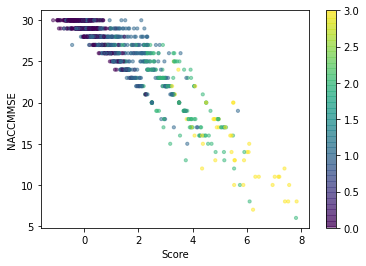

In [25]:
x = data ["Formula"]
y = data["NACCMMSE"]
labels = data["CDRGLOB"]
plt.scatter(x, y, s=10, cmap = "viridis", c=labels, alpha=0.5)
plt.xlabel("Score")
plt.ylabel("NACCMMSE")
plt.colorbar()
plt.show()

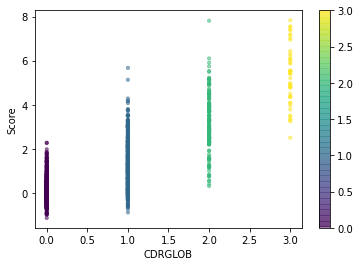

In [26]:
x = data ["CDRGLOB"]
y = data["Formula"]
labels = data["CDRGLOB"]
plt.scatter(x, y, s=10, cmap = "viridis", c=labels, alpha=0.5)
plt.xlabel("CDRGLOB")
plt.ylabel("Score")
plt.colorbar()
plt.show()

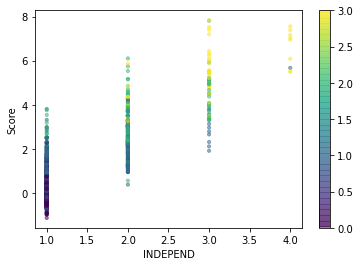

In [27]:
x = data ["INDEPEND"]
y = data["Formula"]
labels = data["CDRGLOB"]
plt.scatter(x, y, s=10, cmap = "viridis", c=labels, alpha=0.5)
plt.xlabel("INDEPEND")
plt.ylabel("Score")
plt.colorbar()
plt.show()